In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.cluster import KMeans

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# correct typo

df.rename({'average_montly_hours':'average_monthly_hours'}, axis=1, inplace=True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1. Perform data quality checks by checking for missing values if any.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No missing values

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2. Understand what factors contributed most to employee turnover by EDA.

### 2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

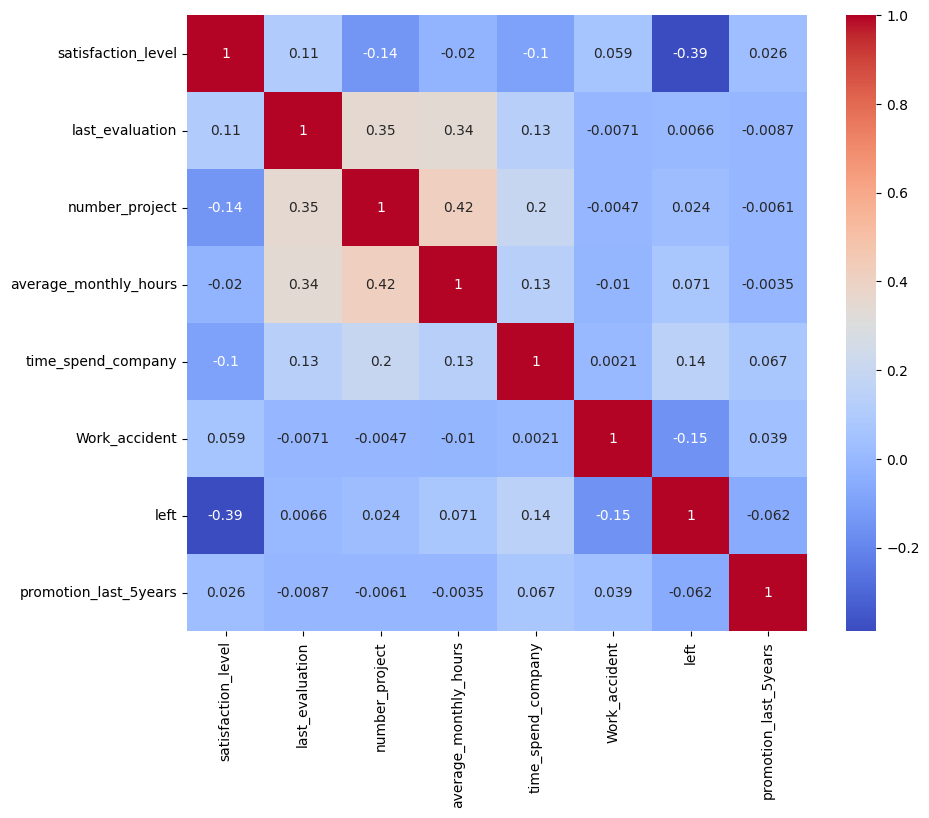

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm', annot=True)
plt.show()

# ... had to downgrade Matplotlib from 3.8 to 3.7. With 3.8, only the frist row gets annotated somehow.
# pip install Matplotlib=3.7.0

### 2.2 Draw the distribution plot of 
* Employee Satisfaction (use column satisfaction_level)
* Employee Evaluation (use column last_evaluation)
* Employee Average Monthly Hours (use column average_montly_hours)

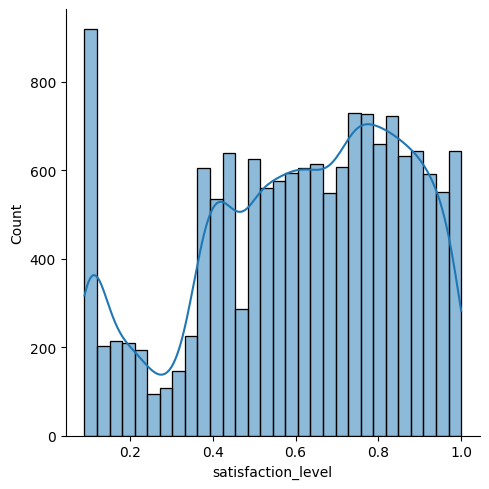

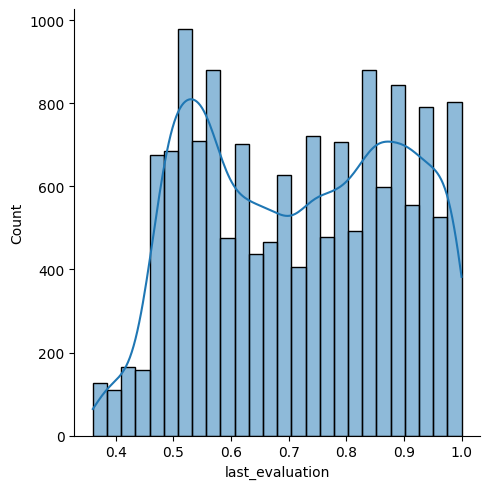

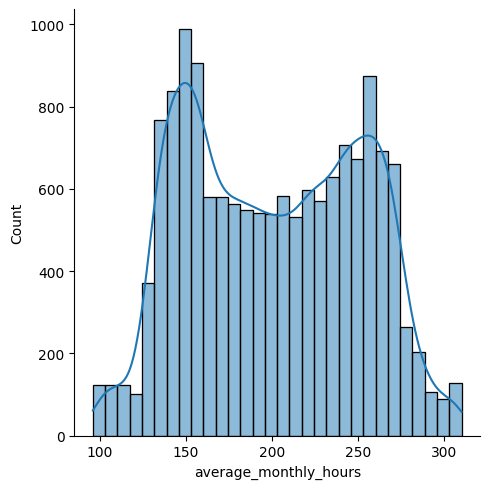

In [12]:
displot_cols = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']

for col in displot_cols:
    sns.displot(df, x=col, kde=True)
    plt.show()

## 2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot

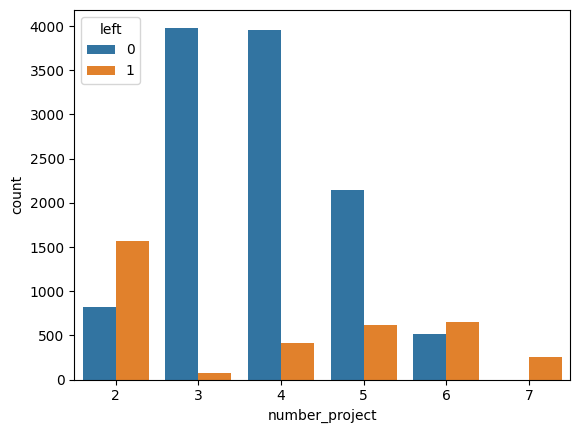

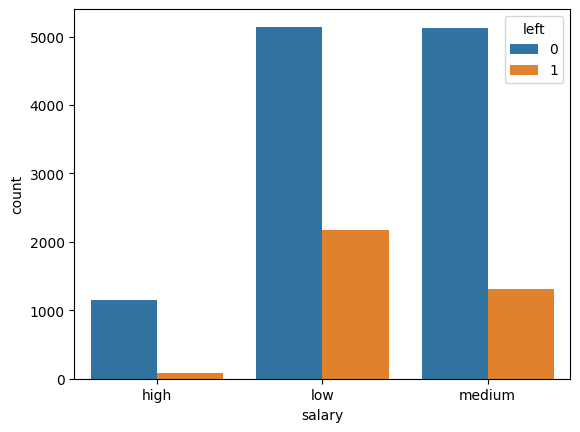

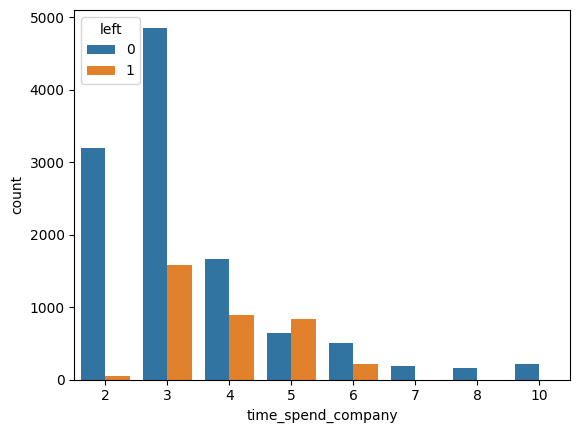

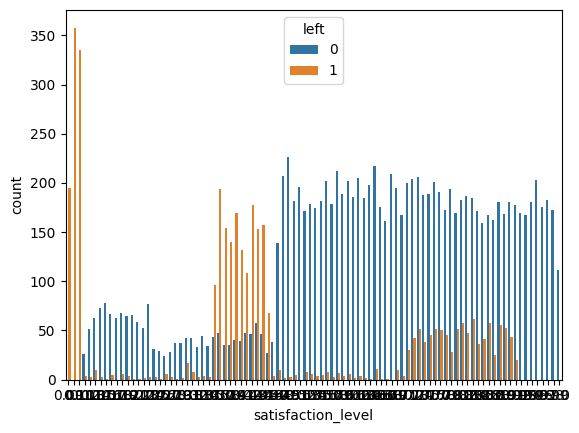

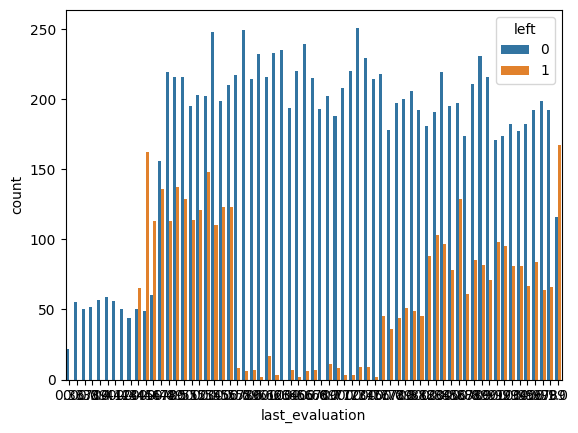

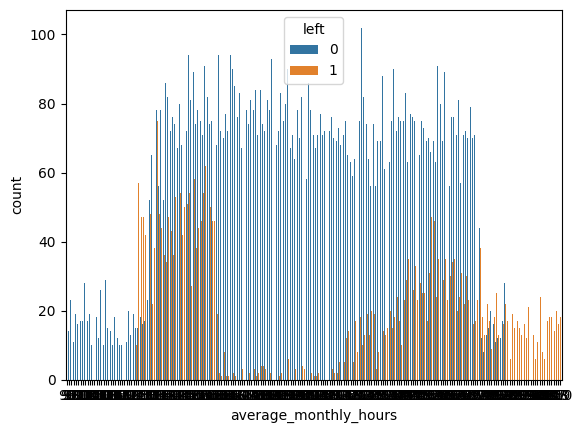

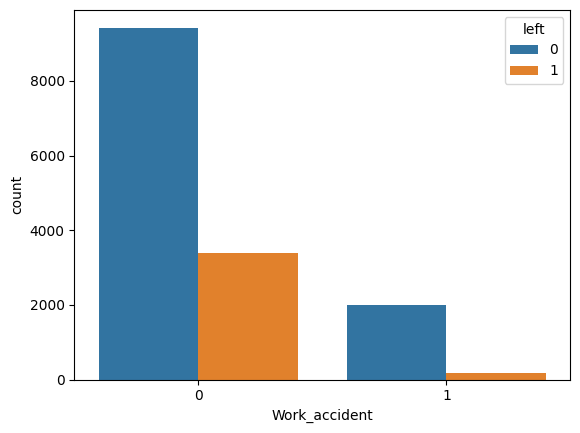

In [14]:
# Drawing more than just the project count to visualize more factors

barplot_cols = ['number_project', 'salary', 'time_spend_company', 'satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'Work_accident']

for col in barplot_cols:
    df2 = df.groupby([col])['left'].value_counts().reset_index(name='count')
    df2 = pd.DataFrame(df2)

    sns.barplot(df2, x=col, y='count', hue='left')
    plt.show()

### Inferences
* People who are either not busy enough or too busy are more likely to leave. 3 - 5 projects appear to be the sweet spot.
* People are more likely to leave after 3 - 6 years
* People with lower salary are more likely to leave

## 3. Perform clustering of employees who left based on their satisfaction and evaluation

### 3.1 Choose columns satisfaction_level, last_evaluation and left

In [17]:
df1 = df[['satisfaction_level', 'last_evaluation', 'left']]
df1['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### 3.2 Do K-Means clustering of employees who left the company into 3 clusters

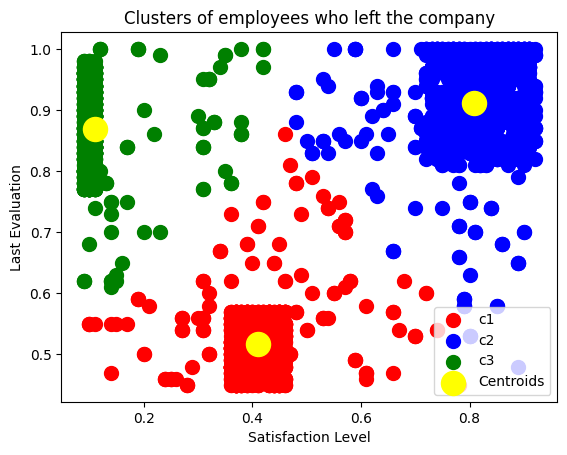

In [19]:
df2 = df1.loc[df1['left'] == 1]
X = df2.drop('left', axis=1).values

numClusters = 3

model = KMeans(n_clusters = numClusters, n_init=10, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

colors = ['red', 'blue', 'green']
labels = ['c1', 'c2', 'c3']

for x in range(numClusters):
    plt.scatter(X[y_kmeans == x, 0], X[y_kmeans == x, 1], s = 100, c = colors[x], label = labels[x])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees who left the company')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

### 3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

* The blue cluster makes sense. Evaluated well and sastisfied. So why did they leave? Further investigation is needed.
* The red cluster also makes sense. Not evaluated well and not satisfied.
* The green cluster, I believe, represents those who have outgrown the company. Evaluated highly but they want to do more.

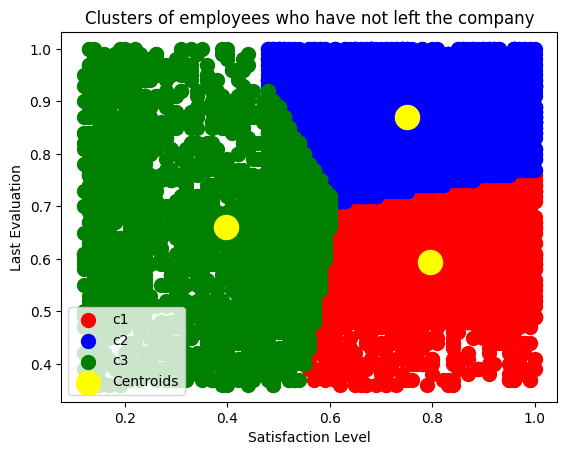

In [21]:
# Out of curiosity, attempt to cluster employees who have not left

df2 = df1.loc[df1['left'] == 0]
X = df2.drop('left', axis=1).values

numClusters = 3

model = KMeans(n_clusters = numClusters, n_init=10, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

for x in range(numClusters):
    plt.scatter(X[y_kmeans == x, 0], X[y_kmeans == x, 1], s = 100, c = colors[x], label = labels[x])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees who have not left the company')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

... Clusters of this data set aren't telling us much...

## 4. Handle the left Class Imbalance using the SMOTE technique

### 4.1 Pre-process the data by converting categorical columns to numerical columns by
* Separating categorical variables and numeric variables.
* Applying get_dummies() to the categorical variables.
* Combining categorical variables and numeric variables.

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])

encoded_df = pd.get_dummies(categorical_df, columns=['sales', 'salary'], drop_first=True, dtype=int)

result_df = pd.concat([numeric_df, encoded_df], axis=1)

result_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [26]:
from sklearn.preprocessing import MinMaxScaler

X = result_df.drop(['left'], axis=1)
y = result_df['left']

# scale columns in X before splitting
scaler = MinMaxScaler()

# The nature of satisfaction_level and last_evaluation indicates that they are already "scaled" between 0 and 1. Scale other 3 remaining integer features.
cols = ['average_monthly_hours', 'time_spend_company', 'number_project']

for col in cols:
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

print(X.head())
print()
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123) 

print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53             0.0               0.285047   
1                0.80             0.86             0.6               0.775701   
2                0.11             0.88             1.0               0.822430   
3                0.72             0.87             0.6               0.593458   
4                0.37             0.52             0.0               0.294393   

   time_spend_company  Work_accident  promotion_last_5years  sales_RandD  \
0               0.125              0                      0            0   
1               0.500              0                      0            0   
2               0.250              0                      0            0   
3               0.375              0                      0            0   
4               0.125              0                      0            0   

   sales_accounting  sales_hr  sales_management  sales_m

### 4.3 Upsample the train dataset using the SMOTE technique from the imblearn module

In [28]:
sm = SMOTE(random_state = 123) 
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

left
0    9142
1    9142
Name: count, dtype: int64

## 5. Perform 5-fold cross-validation model training and evaluate performance
### 5.1 Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report

In [30]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):
    print (classification_report(y_true, y_pred)) # print classification report for each fold
    return accuracy_score(y_true, y_pred) # return accuracy score

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
                        
log_reg_scores = cross_val_score(log_reg, X, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))

print("Mean score of %0.2f with a standard deviation of %0.2f" % (log_reg_scores.mean(), log_reg_scores.std()))

log_reg_y_pred = cross_val_predict(log_reg, X, y, cv=kfold)
log_reg_accuracy = accuracy_score(log_reg_y_pred.astype(int), y.astype(int))
print(log_reg_accuracy)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2285
           1       0.60      0.37      0.46       715

    accuracy                           0.79      3000
   macro avg       0.71      0.65      0.66      3000
weighted avg       0.77      0.79      0.77      3000

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2286
           1       0.59      0.32      0.41       714

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.61      0.34      0.44       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

              preci

In [32]:
# for good measure, try with LogicticRegressionCV. Should result in similar scores

from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(cv=kfold, scoring='accuracy', random_state=42)
lrcv.fit(X, y)
print(lrcv.scores_[1].mean(axis=0).max()) 
print(lrcv.scores_)

0.7917189729909969
{1: array([[0.76166667, 0.76166667, 0.77133333, 0.78366667, 0.79366667,
        0.79633333, 0.79633333, 0.79633333, 0.79633333, 0.79633333],
       [0.762     , 0.762     , 0.77033333, 0.77566667, 0.78966667,
        0.792     , 0.792     , 0.792     , 0.792     , 0.792     ],
       [0.762     , 0.762     , 0.77166667, 0.785     , 0.79766667,
        0.798     , 0.799     , 0.799     , 0.799     , 0.799     ],
       [0.762     , 0.762     , 0.776     , 0.77333333, 0.782     ,
        0.787     , 0.78666667, 0.78666667, 0.78666667, 0.78666667],
       [0.76192064, 0.76192064, 0.77425809, 0.77625875, 0.7795932 ,
        0.78426142, 0.78459486, 0.78459486, 0.78459486, 0.78459486]])}


### 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report

In [34]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(random_state = 42)

rand_for_scores = cross_val_score(rand_for, X, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))

print("Mean score of %0.2f with a standard deviation of %0.2f" % (rand_for_scores.mean(), rand_for_scores.std()))

rand_for_y_pred = cross_val_predict(rand_for, X, y, cv=kfold)
rand_for_accuracy = accuracy_score(rand_for_y_pred.astype(int), y.astype(int))

print(rand_for_accuracy)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2285
           1       0.99      0.96      0.98       715

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

              preci

### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state = 42)

grad_boost_scores = cross_val_score(grad_boost, X, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))

print("Mean score of %0.2f with a standard deviation of %0.2f" % (grad_boost_scores.mean(), grad_boost_scores.std()))

grad_boost_y_pred = cross_val_predict(grad_boost, X, y, cv=kfold)
grad_boost_accuracy = accuracy_score(grad_boost_y_pred.astype(int), y.astype(int))

print(grad_boost_accuracy)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2285
           1       0.97      0.92      0.95       715

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

              preci

## 6. Identify the best model and justify the evaluation metrics used
### 6.1 Find the ROC/AUC for each model and plot the ROC curve

#### 6.1.1 Logistic Regression

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, model_name, X_train, y_train, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr,tpr)
    plt.title(model_name + ' ROC')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print('AUC: ', auc)

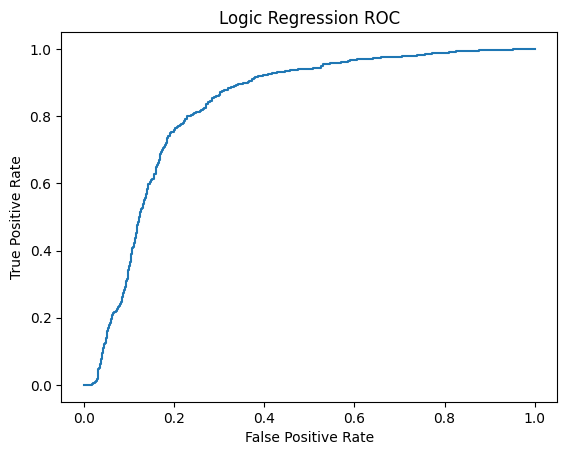

AUC:  0.827264239028945


In [40]:
log_reg.fit(X_train, y_train)

plot_roc(log_reg, 'Logic Regression', X_train, y_train, X_test, y_test)

#### 6.1.2 Random Forest

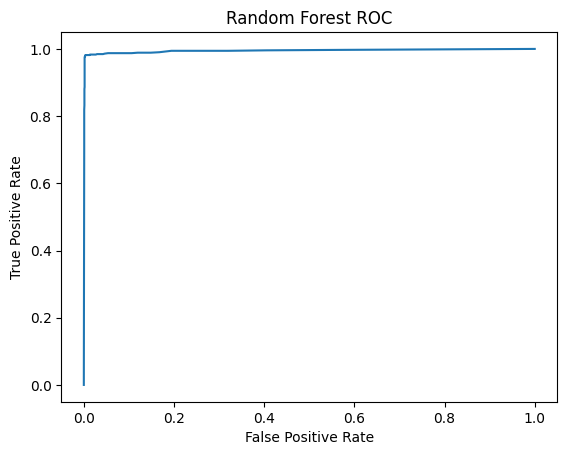

AUC:  0.9945965700365886


In [42]:
rand_for.fit(X_train, y_train)

plot_roc(rand_for, 'Random Forest', X_train, y_train, X_test, y_test)

#### 6.1.3 Gradient Boosting

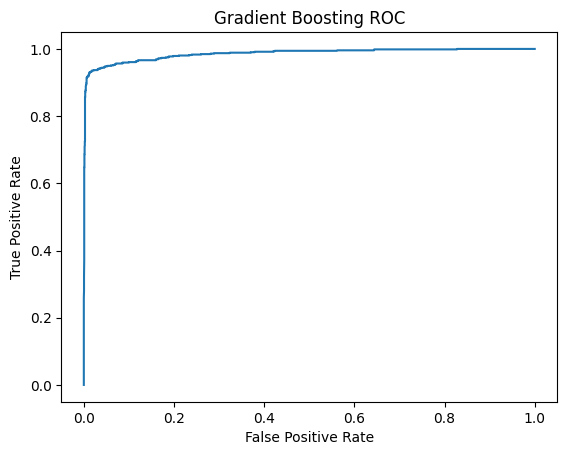

AUC:  0.9859055608245049


In [44]:
grad_boost.fit(X_train, y_train)

plot_roc(grad_boost, 'Gradient Boosting', X_train, y_train, X_test, y_test)

### 6.2 Find the confusion matrix for each of the models

#### 6.2.1 Logistic Regression

In [46]:
lr_y_pred = log_reg.predict(X_test)

lrcm = confusion_matrix(y_test, lr_y_pred)
lrcm

array([[1718,  568],
       [ 135,  579]])

In [47]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.50      0.81      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



<Axes: >

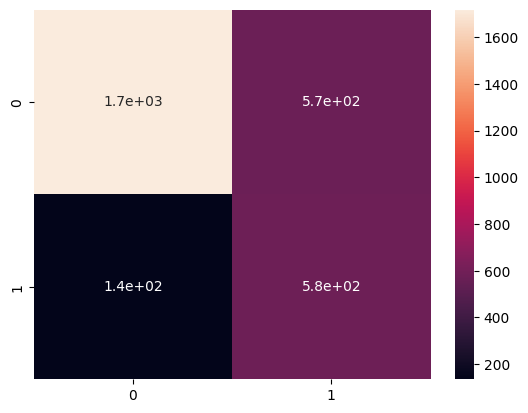

In [48]:
sns.heatmap(lrcm, annot=True)

#### 6.2.2 Random Forest

In [50]:
rf_y_pred = rand_for.predict(X_test)

rdcm = confusion_matrix(y_test, rf_y_pred)
rdcm

array([[2275,   11],
       [  13,  701]])

In [51]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



<Axes: >

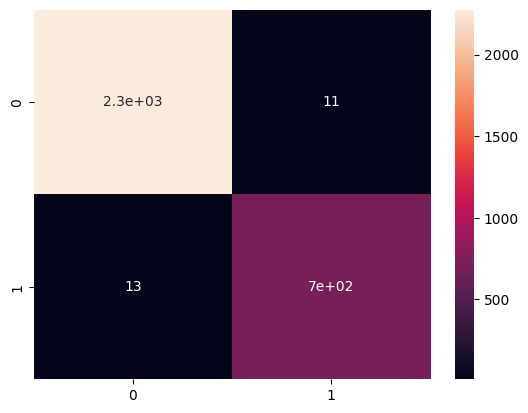

In [52]:
sns.heatmap(rdcm, annot=True)

#### 6.2.3 Gradient Boosting

In [54]:
gb_y_pred = grad_boost.predict(X_test)

gbcm = confusion_matrix(y_test, gb_y_pred)
gbcm

array([[2232,   54],
       [  45,  669]])

In [55]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



<Axes: >

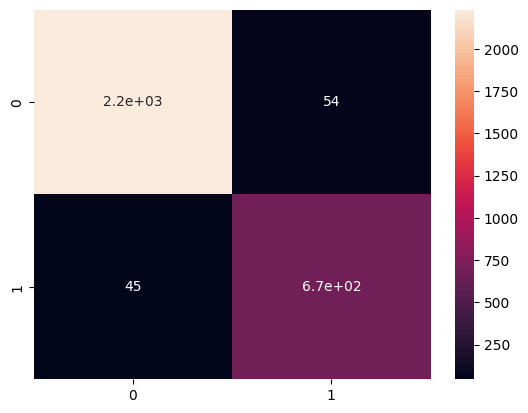

In [56]:
sns.heatmap(gbcm, annot=True)

### 6.3 Explain which metric needs to be used from the confusion matrix - Recall or Precision?

For the objective of this research, we are trying to avoid any surprise departure by an employee. We want false negative to be low. Therefore, we should focus more on Recall.

### Overall, Random Forest scored the highest.

## 7. Suggest various retention strategies for targeted employees
### 7.1 Using the best model, predict the probability of employee turnover in the test data

Based on scores above, we conclude that Random Forest is the best model for our purpose.

In [61]:
y_pred = rand_for.predict_proba(X_test)
y_pred

array([[1.  , 0.  ],
       [0.66, 0.34],
       [0.97, 0.03],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [0.  , 1.  ]])

In [62]:
y_pred[:,1]

array([0.  , 0.34, 0.03, ..., 0.02, 0.03, 1.  ])

### 7.2 a. Based on the probability score range below, categorize the employees into four zones

In [64]:
test_data = X_test # preserve X_test

test_data.loc[:, "Probability"] = y_pred[:,1]

categories = ['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone']
colors = ['Green', 'Yellow', 'Orange', 'Red']
bins = [-1, 0.2, 0.6, 0.9, 1.0]

test_data['Zone'] = pd.cut(test_data['Probability'], bins=bins, labels=categories)
test_data['Colors'] = pd.cut(test_data['Probability'], bins=bins, labels=colors)

test_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,...,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,Probability,Zone,Colors
10627,0.98,0.77,0.2,0.443925,0.000,0,0,0,0,0,...,0,0,1,0,0,0,1,0.00,Safe Zone,Green
2703,0.76,0.93,0.2,0.817757,0.375,0,0,0,0,1,...,0,0,0,0,0,1,0,0.34,Low Risk Zone,Yellow
6059,0.70,0.93,0.2,0.415888,0.250,0,0,0,1,0,...,0,0,0,0,0,0,1,0.03,Safe Zone,Green
3258,0.48,0.61,0.2,0.593458,0.125,1,0,0,0,0,...,0,0,0,1,0,0,1,0.02,Safe Zone,Green
4565,0.57,0.90,0.2,0.224299,0.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0.00,Safe Zone,Green


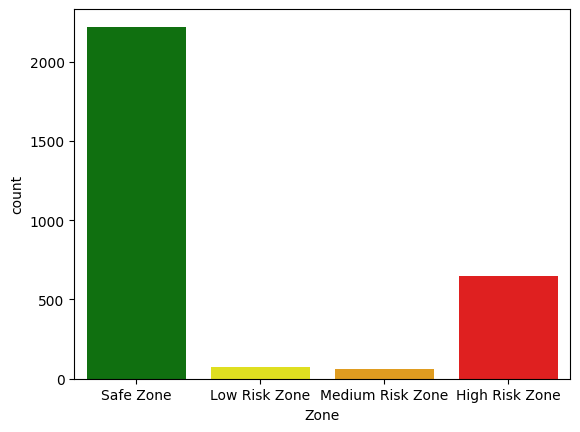

In [65]:
sns.countplot(data=test_data, x='Zone', palette=colors)
plt.show()

### 7.2 b. Suggest your thoughts on the retention strategies for each zone

In [67]:
# Identify important features

feat_labels = X_train.columns
importance = rand_for.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1] # descending order

for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feat_labels[index], (importance[index] *100.0)))

satisfaction_level - 26.61%
time_spend_company - 24.86%
number_project - 17.20%
average_monthly_hours - 15.43%
last_evaluation - 11.45%
Work_accident - 1.36%
salary_low - 0.69%
sales_technical - 0.44%
salary_medium - 0.36%
sales_sales - 0.32%
sales_support - 0.28%
promotion_last_5years - 0.24%
sales_accounting - 0.17%
sales_hr - 0.16%
sales_management - 0.13%
sales_RandD - 0.12%
sales_marketing - 0.11%
sales_product_mng - 0.09%


We need to focus on these factors?
* satisfaction_level - 26.61%
* time_spend_company - 24.86%
* number_project - 17.20%
* average_monthly_hours - 15.43%
* last_evaluation - 11.45%

* Safe Zone (Green) (Score < 20%)
1. Satisfaction level is the most important factor. Regardless of the turnover probability, we must continously evaluate what satisfies employees and how we can improve. Continous improvement on the company culture should always be part of the improvement.
1. Evaluate those with high satisfaction level. Find out what makes them satisfied.
1. Evaluate the length of tenure for each employee in this zone. Newer employees may move to a higher risk zone in a year or two. Pay special attention to their satisfaction level, last evaluation and work load (i.e. average monthly hours and number of projects)

* Low Risk Zone (Yellow) (20% < Score < 60%)
1. Same as Safe Zone recommendations. At this level, we just need to continue to improve attractiveness as an employer.
1. Council those who scored low on their last evaluation.

* Medium Risk Zone (Orange) (60% < Score < 90%)
1. Continue improving the company culture
1. Evaluate their work load (i.e. average monthly hours and number of projects). Are they overworked or not engaged enough?
1. Council those who scored low on their last evaluation.
1. Interview those with low satisfaction. Find out causes and ways to improve.

* High Risk Zone (Red) (Score > 90%)
1. Continue improving the company culture
1. Evaluate their work load (i.e. average monthly hours and number of projects). Are they overworked or not engaged enough?
1. Identify those who scored high on their last evaluation. At this risk level, we need to focus on retaining competent employees.
1. Identify those with high satisfaction level. At this risk level, we need to focus on retaining those who are otherwise satisfied.
1. ... with that said, try to identify causes for low satisfaction